In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r'../Cascade_Seismic_Stations.xlsx', sheet_name='Hood')
df_s=df#.iloc[0:210]
df_s=df_s.sort_values('Start Yr', ascending=True)
df_t=df_s.loc[df_s['Latitude']>0].reset_index(drop=True)

In [3]:
df_t

,Network,Name,Latitude,Longitude,Start Date,End Date,Start Yr,End Yr,"Classification: 1sp, 3sp, 3bb",Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,UW,VLL,45.463169,-121.680351,1980-10-01,2599-12-31 00:00:00,1980.0,2599.0,1sp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UW,MHD,45.397499,-121.702919,1980-07-11,1993-10-01 00:00:00,1980.0,1993.0,1sp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UW,VFP,45.317902,-121.466270,1980-10-01,2599-12-31 00:00:00,1980.0,2599.0,1sp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UW,VHE,45.329010,-121.667023,1980-02-04,1983-08-01 00:00:00,1980.0,1983.0,1sp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UW,TDH,45.289669,-121.791519,1982-09-01,2599-12-31 00:00:00,1982.0,2599.0,1sp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UW,HOOD,45.322262,-121.650932,2002-11-05,2599-12-31 00:00:00,2002.0,2599.0,3bb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CC,CC_TIMB,45.335720,-121.710358,2006-09-29,2011-10-01 00:00:00,2006.0,2011.0,1sp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,UW,UW_TIMB,45.335720,-121.710358,2011-09-09,2013-10-31 00:00:00,2011.0,2013.0,1sp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CC,CC_TIMB,45.335720,-121.710358,2011-10-01,2019-09-26 00:00:00,2013.0,2019.0,3sp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CC,HIYU,45.435230,-121.807396,2013-11-19,2599-12-31 00:00:00,2013.0,2019.0,3sp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t


In [4]:
sp1_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="1sp") & (df_t['End Yr']>=2022)
bb3_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="3bb")  & (df_t['End Yr']>=2022)
sp3_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="3sp")& (df_t['End Yr']>=2022)
if_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="IS")& (df_t['End Yr']>=2022)

sp1_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="1sp") & (df_t['End Yr']<2022)
bb3_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="3bb")  & (df_t['End Yr']<2022)
sp3_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="3sp")& (df_t['End Yr']<2022)
if_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="IS")& (df_t['End Yr']<2022)

In [5]:
df_t.loc[sp3_p]
df_t['Name_No_Temp']=df_t['Name']

## Loop for unique /name

C:\Users\penny\AppData\Local\Temp\ipykernel_22064\2990534501.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(name.tolist())#, rotation=90)


['VLL' 'MHD' 'VFP' 'VHE' 'TDH' 'HOOD' 'CC_TIMB' 'UW_TIMB' 'HIYU' 'PALM'
 'SHRK' 'BRSP' 'LSON' 'YOCR' 'MHX' 'HTHR' 'STAD']


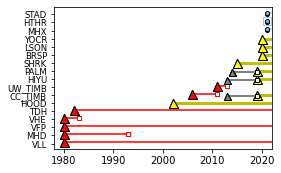

In [9]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10*(139.5/254)*0.71,4*(78.1/101.6)*0.85), sharey=True)

Unique_station=df_t['Name_No_Temp'].unique()
i=0
name=np.empty((len(Unique_station)),  np.dtype('U100'))
for station in Unique_station:
    #print(station)
    name[i]=str(df_t['Name_No_Temp'].loc[df_t['Name_No_Temp']==station].iloc[0])
    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="IS"):
        Stat_type_IS=((df_t['Name_No_Temp']==station)&(df_t['Classification: 1sp, 3sp, 3bb ']=="IS"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_IS],
                  df_t['End Yr'].loc[Stat_type_IS]], [i+0.15, i+0.15], '-', color='lightskyblue')
        ax1.plot([df_t['End Yr'].loc[Stat_type_IS],
                  df_t['End Yr'].loc[Stat_type_IS]], [i+0.15, i+0.15], 'sk', mec='lightskyblue',mfc='white', ms=8)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_IS],
                  df_t['Start Yr'].loc[Stat_type_IS]], [i+0.1, i+0.15], 'ok', mfc='lightskyblue', ms=4)

        
    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="1sp"):
        Stat_type_1sp=((df_t['Name_No_Temp']==station)&(df_t['Classification: 1sp, 3sp, 3bb ']=="1sp"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_1sp],
                  df_t['End Yr'].loc[Stat_type_1sp]], [i+0.15, i+0.15], '-r')
        ax1.plot([df_t['End Yr'].loc[Stat_type_1sp],
                  df_t['End Yr'].loc[Stat_type_1sp]], [i+0.15, i+0.15], 'sk', mec='red',mfc='white', ms=4)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_1sp],
                  df_t['Start Yr'].loc[Stat_type_1sp]], [i+0.15, i+0.15], '^k', mfc='red', ms=9)

    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="3bb"):
        Stat_type_3bb=((df_t['Name_No_Temp']==station)
                       &(df_t['Classification: 1sp, 3sp, 3bb ']=="3bb"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3bb],
                  df_t['End Yr'].loc[Stat_type_3bb]], [i, i], '-y', linewidth=3)
        ax1.plot([df_t['End Yr'].loc[Stat_type_3bb],
                  df_t['End Yr'].loc[Stat_type_3bb]], [i, i], 'sk', mec='k', mfc='white', ms=4, zorder=1000)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3bb],
                  df_t['Start Yr'].loc[Stat_type_3bb]], [i, i],  '^k', mfc='yellow', ms=9)

    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="3sp"):
        Stat_type_3sp=((df_t['Name_No_Temp']==station)
                       &(df_t['Classification: 1sp, 3sp, 3bb ']=="3sp"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3sp],
                  df_t['End Yr'].loc[Stat_type_3sp]], [i-0.1, i-0.1], '-', color='grey', linewidth=2, zorder=100)
        ax1.plot([df_t['End Yr'].loc[Stat_type_3sp],
                  df_t['End Yr'].loc[Stat_type_3sp]], [i-0.1, i-0.1], 'sk', mfc='white', ms=4, zorder=100)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3sp],
                  df_t['Start Yr'].loc[Stat_type_3sp]], [i-0.1, i-0.1], '^k', mfc='grey', ms=7, zorder=100)
        
        # Now print the lines
        
    i=i+1

#     if df_t['Classification: 1sp, 3sp, 3bb '].iloc[i]=="3bb":
#         ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-',
#                  color='y', lw=3)
#         ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='yellow', ms=12)
        
#     if df_t['Classification: 1sp, 3sp, 3bb '].iloc[i]=="3sp":
#         ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-',
#                  color='grey', lw=3)
#         ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='grey', ms=12)
        
        
#     #ax1.plot([df_t['Start Yr'].iloc[i],df_t['Start Yr'].iloc[i]], [i, i], '^k', mfc='white')
#     #ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='white', ms=8)
ax1.set_xlim([1978, 2022])
#     name[i]=str(df_t['Name'].iloc[i])
#     #print(df_t['Name'].iloc[i])
ax1.set_yticklabels(name.tolist())#, rotation=90)
ticks_loc = ax1.get_yticks().tolist()
ax1.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
#ax1.set_ylim([-0.5, 4.5])
print(name)
ax1.set_yticklabels(name.tolist(), fontsize=8.5)

# #df_t['Classification: 1sp, 3sp, 3bb ']

fig.savefig('Hood_Seismic_Stations.png', dpi=300, bbox_inches='tight')

In [63]:
name_plot=np.empty((len(df_t)),  np.dtype('U100'))
for i in range(0, len(df_t)):
    name_plot[i]=str(df_t['Name_No_Temp'].iloc[i])

In [42]:
df['Longitude'].unique()

array([-121.70843 ,         nan, -121.807396, -121.659045, -121.64719 ,
       -121.672363, -121.705536, -121.52877 , -121.659385, -121.710358,
       -121.743539, -121.650932, -121.702919, -121.791519, -121.46627 ,
       -121.667023, -121.680351])

In [50]:
df_t.loc[if_r]

,Network,Name,Latitude,Longitude,Start Date,End Date,Start Yr,End Yr,"Classification: 1sp, 3sp, 3bb",Unnamed: 9,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Name_No_Temp
2,CC,HTHR,45.338775,-121.659045,2021-01-05,2021-03-11 00:00:00,2021.0,2021.0,IS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTHR


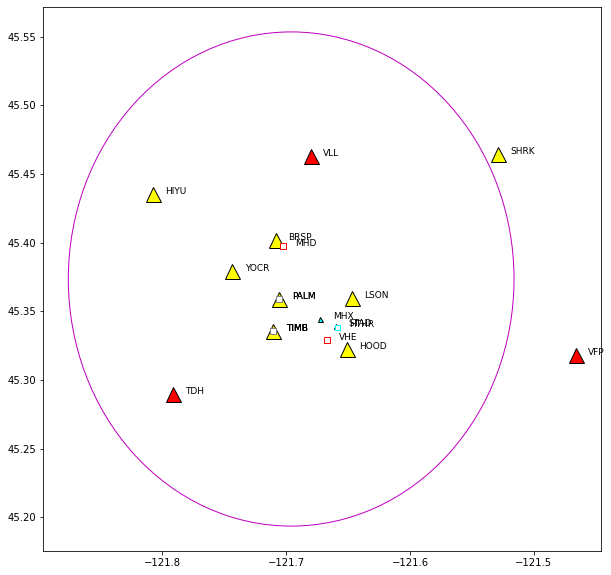

In [49]:
fig, (ax1) = plt.subplots(1, figsize=(10,10), sharey=True)

import matplotlib.patches as patches
rect = patches.Circle((-121.69599,45.3735),0.18,linewidth=1,edgecolor='m',facecolor='none', label='test')

# Add the patch to the Axes
ax1.add_patch(rect)

ax1.plot(df_t['Longitude'].loc[if_p],
              df_t['Latitude'].loc[if_p],
         '^k', mfc='cyan', ms=5)

ax1.plot(df_t['Longitude'].loc[if_r],
              df_t['Latitude'].loc[if_r],
         'sk', mec='cyan', mfc='white', ms=5)

ax1.plot(df_t['Longitude'].loc[sp1_p],
              df_t['Latitude'].loc[sp1_p],
         '^k', mfc='red', ms=15)
ax1.plot(df_t['Longitude'].loc[bb3_p],
              df_t['Latitude'].loc[bb3_p],
         '^k', mfc='yellow', ms=15)
ax1.plot(df_t['Longitude'].loc[sp3_p],
              df_t['Latitude'].loc[sp3_p],
         '^k', mfc='grey', ms=15)


ax1.plot(df_t['Longitude'].loc[sp1_r],
              df_t['Latitude'].loc[sp1_r],
         'sr',  mfc='w')
ax1.plot(df_t['Longitude'].loc[bb3_r],
              df_t['Latitude'].loc[bb3_r],
         'sy',  mfc='w')
ax1.plot(df_t['Longitude'].loc[sp3_r],
              df_t['Latitude'].loc[sp3_r],
         's', mec='grey', mfc='w')
for i in range(0, len(df_t)):
    ax1.annotate(name_plot[i],
                 xy=(df_t['Longitude'].iloc[i]+0.01,
              df_t['Latitude'].iloc[i]),
                 xycoords="data", fontsize=H9)

In [45]:
str(df_t['Name'].values)

"['BRSP' 'HIYU' 'HTHR' 'LSON' 'MHX' 'PALM' 'PALM' 'SHRK' 'STAD' 'TIMB'\n 'TIMB' 'TIMB' 'YOCR' 'HOOD' 'MHD' 'TDH' 'TIMB' 'VFP' 'VHE' 'VLL']"

## Different plots showing age progresion

In [7]:
a=['Exp Pet', 'Exp Pet', 'MT', 'Seismics']
type(a)

list

In [8]:
name=np.empty(len(df_t), np.dtype('U100'))
df_t['Name'].iloc[1]
name[1]=str(df_t['Name'].iloc[1])

In [9]:
name

array(['', 'LCF', '', '', '', '', '', '', '', '', '', '', ''],
      dtype='<U100')

['LBA' 'LCF' 'LDH' 'LEL' 'LEL (temp)' 'LME' 'LMZ' 'LRD'
 'LRD (temp. upgrade)' 'LRR' 'LRR (upgrade)' 'LSI' 'LSL']


[Text(0, 0, 'LBA'),
 Text(0, 1, 'LCF'),
 Text(0, 2, 'LDH'),
 Text(0, 3, 'LEL'),
 Text(0, 4, 'LEL (temp)'),
 Text(0, 5, 'LME'),
 Text(0, 6, 'LMZ'),
 Text(0, 7, 'LRD'),
 Text(0, 8, 'LRD (temp. upgrade)'),
 Text(0, 9, 'LRR'),
 Text(0, 10, 'LRR (upgrade)'),
 Text(0, 11, 'LSI'),
 Text(0, 12, 'LSL')]

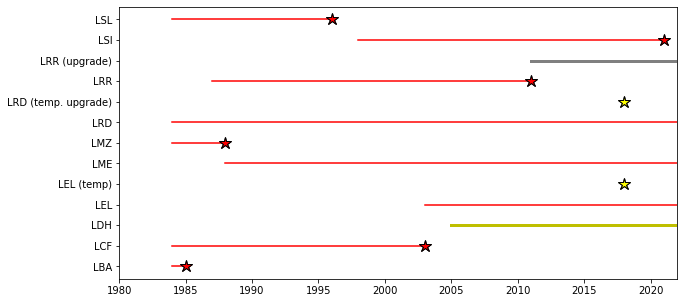

In [94]:
len(name)

13

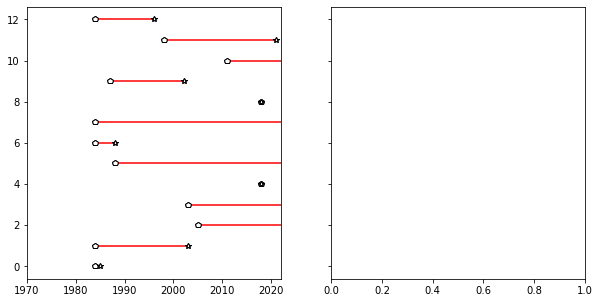

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
for i in range(0, len(df_t)):
    if 
    ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-r')
    ax1.plot([df_t['Start Yr'].iloc[i],df_t['Start Yr'].iloc[i]], [i, i], '^k', mfc='white')
    ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='white')
    ax1.set_xlim([1970, 2022])
#df_t['Classification: 1sp, 3sp, 3bb ']

# 0  Bar for each different seimometer

## 1. CDF function